In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.shape

(150, 4)

In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


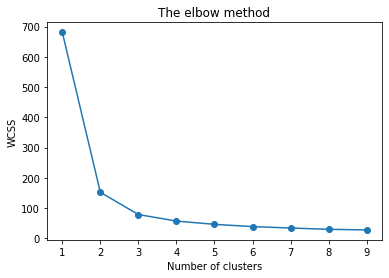

In [6]:
cluster_range = range(1,10)
inertias=[]
for c in cluster_range:
  kmeans = KMeans(init="k-means++",n_clusters=c,n_init=10,random_state=0).fit(data)
  inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_range,inertias,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

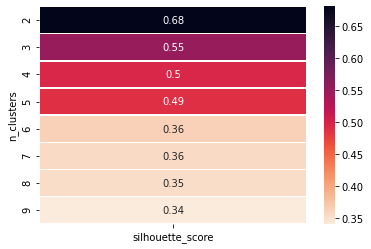

In [7]:
import seaborn as sns
cluster_range = range(2,10)
result=[]
for c in cluster_range:
  kmeans = KMeans(init="k-means++",n_clusters=c,n_init=10,random_state=0).fit_predict(data)
  silhouette_avg = silhouette_score(data,kmeans)
  result.append([c,silhouette_avg])

ans = pd.DataFrame(result,columns=["n_clusters","silhouette_score"])
pivot_kmeans= pd.pivot_table(ans,index="n_clusters",values="silhouette_score")
plt.figure()
sns.heatmap(pivot_kmeans,annot=True,linewidth=0.5,cmap=sns.cm.rocket_r)
plt.show()

In [79]:
model = KMeans(init="k-means++",n_clusters=3,n_init=10,random_state=0)
kmeans = model.fit(data)
labels = pd.DataFrame(kmeans.labels_)
clustered_data = data.assign(cluster= labels)

In [80]:
clustered_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


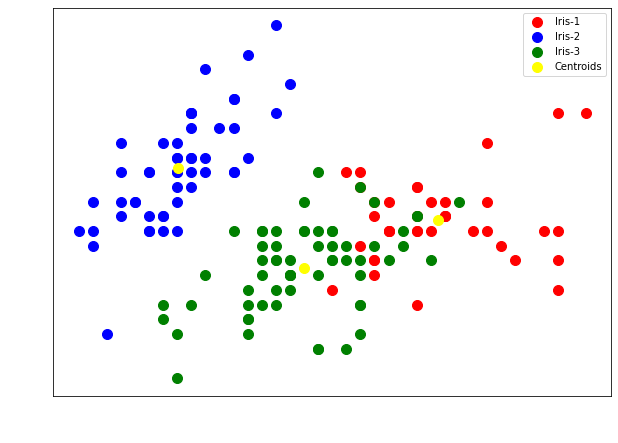

In [81]:

plt.rcParams['figure.figsize'] = [10, 50]
axes = plt.subplot(6,1,i)
axes.xaxis.label.set_color("white")
axes.yaxis.label.set_color("white")
axes.tick_params(axis='x', colors='white') 
axes.tick_params(axis='y', colors='white')
plt.scatter(clustered_data[clustered_data["cluster"]==0]['sepal length (cm)'],clustered_data[clustered_data["cluster"]==0]['sepal width (cm)'], 
                    s = 100, c = 'red', label = 'Iris-1')
plt.scatter(clustered_data[clustered_data["cluster"]==1]['sepal length (cm)'],clustered_data[clustered_data["cluster"]==1]['sepal width (cm)'], 
                    s = 100, c = 'blue', label = 'Iris-2')
plt.scatter(clustered_data[clustered_data["cluster"]==2]['sepal length (cm)'],clustered_data[clustered_data["cluster"]==2]['sepal width (cm)'],
                    s = 100, c = 'green', label = 'Iris-3')

        # Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
                    s = 100, c = 'yellow', label = 'Centroids')
axes.set_xlabel(x, fontsize=20)
axes.set_ylabel(y, fontsize=20)
plt.legend()

 